# sklearnを使った機械学習

- [Pythonで儲かるＡＩをつくる](https://www.amazon.co.jp/dp/4296106961)

## 乳がんのデータ分析

In [96]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display

np.set_printoptions(suppress=True, precision=4)
pd.options.display.float_format = '{:.4f}'.format
pd.set_option("display.max_columns", None)
plt.rcParams["font.size"] = 14
random_seed = 123

In [97]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [98]:
columns = [f'{attr}_{crit}' for crit in ['mean', 'stdev', 'max']
            for attr in ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
                'concavity', 'concave-points', 'symmetry', 'fractal-dimension']]

In [99]:
df = pd.DataFrame(cancer.data, columns=columns)
y = pd.Series(cancer.target)

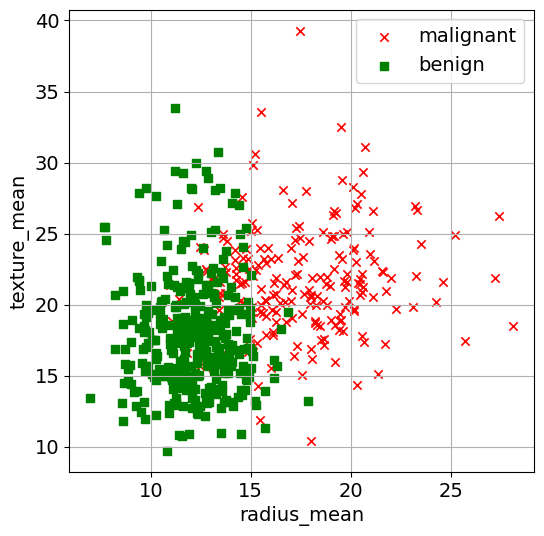

In [100]:
df0 = df[y == 0]
df1 = df[y == 1]

plt.figure(figsize=(6, 6))
plt.scatter(df0['radius_mean'], df0['texture_mean'], marker='x', c='r', label='malignant')
plt.scatter(df1['radius_mean'], df1['texture_mean'], marker='s', c='g', label='benign')
plt.grid()
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.legend()

In [101]:
input_columns = ['radius_mean', 'texture_mean']
x = df[input_columns]

In [102]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.7, test_size=0.3, random_state=random_seed
)

In [103]:
# checking the consistency in dimensions of data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((398, 2), (171, 2), (398,), (171,))

In [104]:
from sklearn.linear_model import LogisticRegression

algorithm = LogisticRegression(random_state=random_seed)

In [105]:
algorithm.fit(x_train, y_train)

y_pred = algorithm.predict(x_test)
result = y_pred == y_test.values
print(f'precision = {sum(result) / len(result):.4f}')

precision = 0.8772


In [106]:
score = algorithm.score(x_test, y_test)
print(f'score: {score:.4f}')

score: 0.8772


In [126]:
# 決定境界の表示関数
def plot_boundary(ax, x, y, algorithm):
    x_train, x_test, y_train, y_test = train_test_split(x, y,
            test_size=0.5, random_state=random_seed)
    # カラーマップ定義
    from matplotlib.colors import ListedColormap
    cmap1 = plt.cm.bwr
    cmap2 = ListedColormap(['#0000FF', '#000000'])

    h = 0.005
    algorithm.fit(x_train, y_train)
    score_test = algorithm.score(x_test, y_test)
    score_train = algorithm.score(x_train, y_train)
    f1_min = x[:, 0].min() - 0.5
    f1_max = x[:, 0].max() + 0.5
    f2_min = x[:, 1].min() - 0.5
    f2_max = x[:, 1].max() + 0.5
    f1, f2 = np.meshgrid(np.arange(f1_min, f1_max, h),
                         np.arange(f2_min, f2_max, h))
    if hasattr(algorithm, "decision_function"):
        Z = algorithm.decision_function(np.c_[f1.ravel(), f2.ravel()])
        Z = Z.reshape(f1.shape)
        ax.contour(f1, f2, Z, levels=[0], linewidth=2)
    else:
        Z = algorithm.predict_proba(np.c_[f1.ravel(), f2.ravel()])[:, 1]
        Z = Z.reshape(f1.shape)
    ax.set_aspect(1)
    ax.contourf(f1, f2, Z, cmap=cmap1, alpha=0.3)
    ax.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cmap2)
    ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cmap2, marker='x')
    text = f'test: {score_test:.2f}  train: {score_train:.2f}'
    ax.text(f1.max() - 0.3, f2.min() + 0.3, text, horizontalalignment='right',
    fontsize=14)


def plot_boundaries(algorithm, DataList):
    plt.figure(figsize=(10, 10))
    N = len(DataList)
    for i, data in enumerate(DataList):
        X, y = data
        ax = plt.subplot(1, N, i+1)
        plot_boundary(ax, X, y, algorithm)
    plt.show()

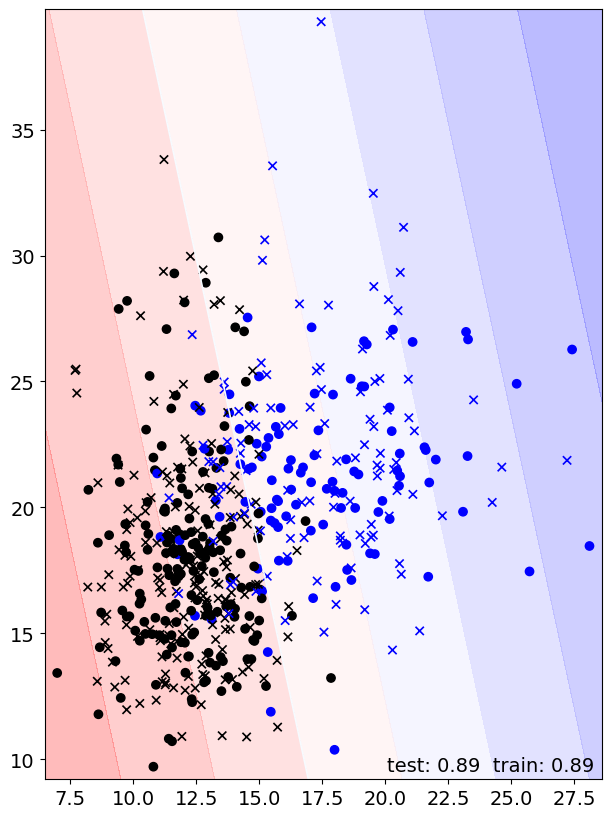

In [127]:
DataList = [(x.to_numpy(), y.to_numpy())]
plot_boundaries(algorithm, [(x.to_numpy(), y.to_numpy())])